
# Draw a pipeline

There is no other way to look into one model stored
in ONNX format than looking into its node with
*onnx*. This example demonstrates
how to draw a model and to retrieve it in *json*
format.

## Retrieve a model in JSON format

That's the most simple way.


In [1]:
from onnxruntime.datasets import get_example

example1 = get_example("mul_1.onnx")

import onnx  # noqa: E402

model = onnx.load(example1)  # model is a ModelProto protobuf message

print(model)

ir_version: 3
producer_name: "chenta"
graph {
  node {
    input: "X"
    input: "W"
    output: "Y"
    name: "mul_1"
    op_type: "Mul"
  }
  name: "mul test"
  initializer {
    dims: 3
    dims: 2
    data_type: 1
    float_data: 1.0
    float_data: 2.0
    float_data: 3.0
    float_data: 4.0
    float_data: 5.0
    float_data: 6.0
    name: "W"
  }
  input {
    name: "X"
    type {
      tensor_type {
        elem_type: 1
        shape {
          dim {
            dim_value: 3
          }
          dim {
            dim_value: 2
          }
        }
      }
    }
  }
  output {
    name: "Y"
    type {
      tensor_type {
        elem_type: 1
        shape {
          dim {
            dim_value: 3
          }
          dim {
            dim_value: 2
          }
        }
      }
    }
  }
}
opset_import {
  domain: ""
  version: 7
}



## Draw a model with ONNX
We use [net_drawer.py](https://github.com/onnx/onnx/blob/main/onnx/tools/net_drawer.py)
included in *onnx* package.
We use *onnx* to load the model
in a different way than before.



In [5]:
from onnx import ModelProto  # noqa: E402

model = ModelProto()
with open(example1, "rb") as fid:
    content = fid.read()
    model.ParseFromString(content)

We convert it into a graph.



In [6]:
from onnx.tools.net_drawer import GetOpNodeProducer, GetPydotGraph  # noqa: E402

pydot_graph = GetPydotGraph(
    model.graph, name=model.graph.name, rankdir="LR", node_producer=GetOpNodeProducer("docstring")
)
pydot_graph.write_dot("graph.dot")

Then into an image



In [7]:
import os  # noqa: E402

os.system("dot -O -Tpng graph.dot")

0

Which we display...



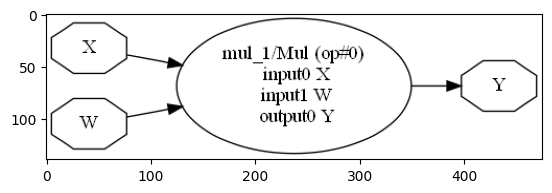

In [8]:
import matplotlib.pyplot as plt  # noqa: E402

image = plt.imread("graph.dot.png")
plt.imshow(image)